In [1]:
import pandas as pd
import numpy as np

In [128]:
data=pd.read_csv('/content/Data.csv')
data.head()

,Warehouse id,Region,SKU id,Apr-18,May-18,Jun-18,Jul-18,Aug-18,Sep-18,Oct-18,...,Aug-20,Sep-20,Oct-20,Nov-20,Dec-20,Jan-21,Feb-21,Mar-21,Apr-21,May-21
0,Wh-1,NORTH,SKU-1,27,13,30,14,22,8,8,...,12,8,8,8,8,8,14,16,8,12
1,Wh-1,NORTH,SKU-2,88,28,127,130,58,10,7,...,16,7,7,7,7,7,13,43,13,43
2,Wh-1,NORTH,SKU-3,6,6,6,6,6,6,6,...,8,6,6,6,6,6,6,8,26,6
3,Wh-1,NORTH,SKU-4,162,184,110,172,90,40,18,...,82,78,38,18,22,28,36,352,58,18
4,Wh-1,NORTH,SKU-5,171,402,627,615,300,417,141,...,468,216,75,6,30,66,141,699,183,24


# RESHAPING THE DATA


In [129]:
df_long = data.melt(id_vars=['Warehouse id', 'Region', 'SKU id'], var_name='month-year', value_name='sales')

# Convert 'month-year' to datetime
df_long['month-year'] = pd.to_datetime(df_long['month-year'], format='%b-%y')

# Display the reshaped dataframe
print(df_long.head())

  Warehouse id Region SKU id month-year  sales
0         Wh-1  NORTH  SKU-1 2018-04-01     27
1         Wh-1  NORTH  SKU-2 2018-04-01     88
2         Wh-1  NORTH  SKU-3 2018-04-01      6
3         Wh-1  NORTH  SKU-4 2018-04-01    162
4         Wh-1  NORTH  SKU-5 2018-04-01    171


#EDA

In [130]:
df_long.columns

Index(['Warehouse id', 'Region', 'SKU id', 'month-year', 'sales'], dtype='object')

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error


# Check for missing values and basic stats
print(df_long.isnull().sum())
print(df_long.describe())



Warehouse id    0
Region          0
SKU id          0
month-year      0
sales           0
dtype: int64
                          month-year         sales
count                          39482  39482.000000
mean   2019-10-16 12:37:53.684210432    216.755610
min              2018-04-01 00:00:00      1.000000
25%              2019-01-01 00:00:00     12.000000
50%              2019-10-16 12:00:00     36.000000
75%              2020-08-01 00:00:00    169.000000
max              2021-05-01 00:00:00  49476.000000
std                              NaN    771.971045


# Total sales by region

<ipython-input-132-f0f746ec6fb8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='sales', data=df_long, estimator='sum',palette='tab10')


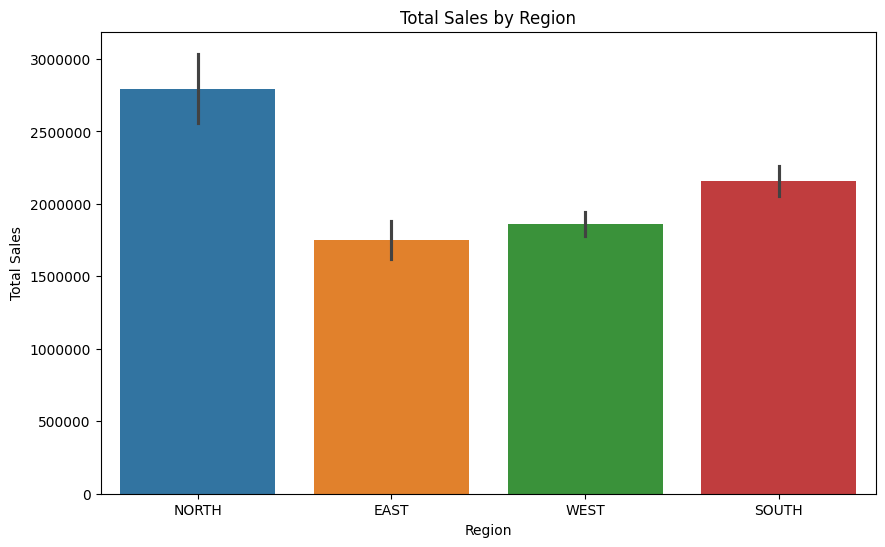

In [132]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='sales', data=df_long, estimator='sum',palette='tab10')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(round(x))}'))

plt.show()



#

#Top 10 sales of sku

<ipython-input-133-ef9befdf8d33>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_sku.index, y=top_10_sku.values, palette='tab10')


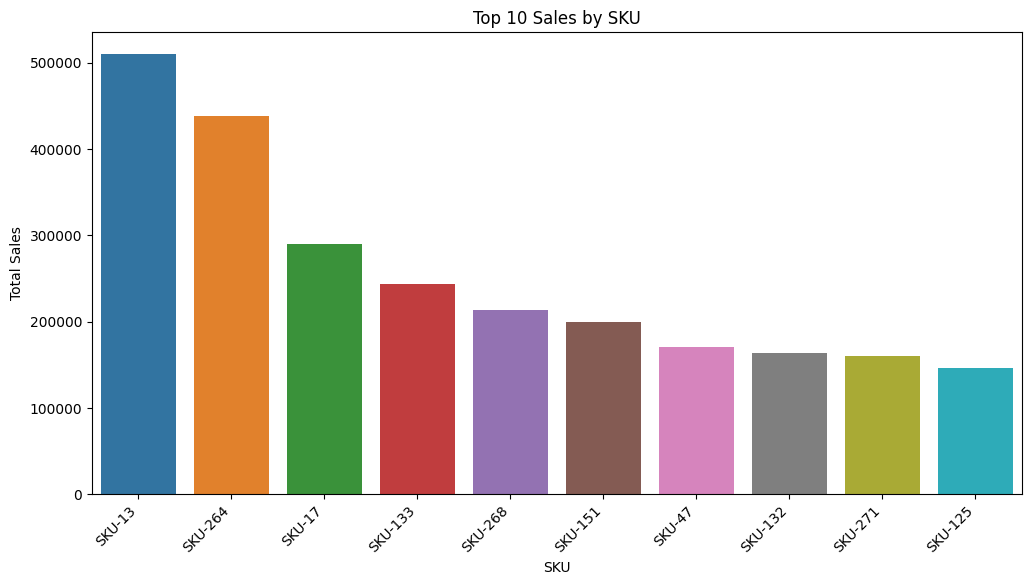

In [133]:
# Aggregate sales by SKU and sort by total sales
top_10_sku = df_long.groupby('SKU id')['sales'].sum().sort_values(ascending=False).head(10)

# Create a bar plot for the top 10 SKUs
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_sku.index, y=top_10_sku.values, palette='tab10')
plt.title('Top 10 Sales by SKU')
plt.xlabel('SKU')
plt.ylabel('Total Sales')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()


#Sales trend over time

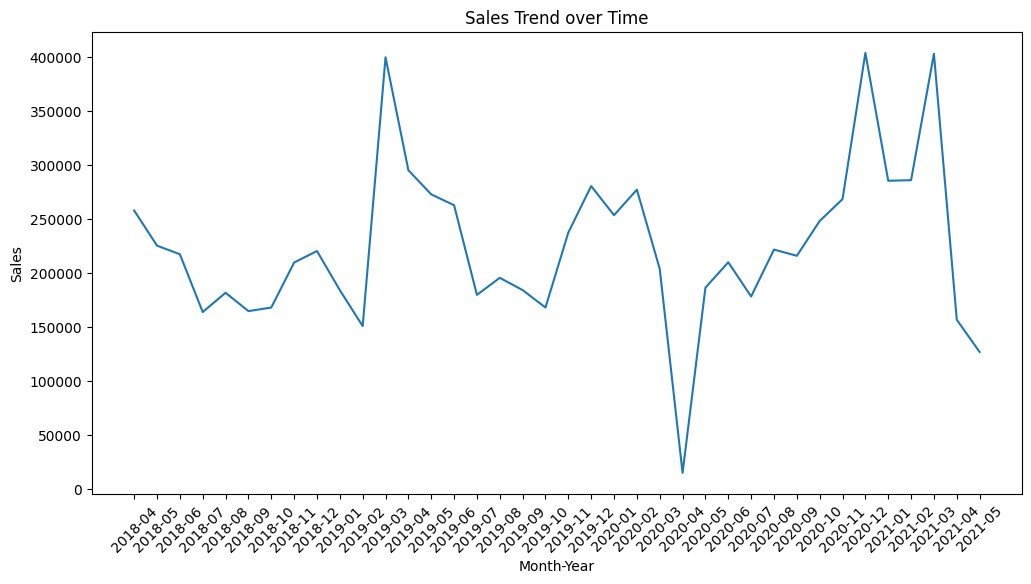

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make a copy of the original DataFrame
df_long_copy = df_long.copy()

# Rename 'month-year' to 'ds' for consistency
df_long_copy.rename(columns={'month-year': 'ds', 'sales': 'y'}, inplace=True)

# Convert 'ds' to datetime and then to Period for aggregation
df_long_copy['ds'] = pd.to_datetime(df_long_copy['ds'])
df_long_copy['year_month'] = df_long_copy['ds'].dt.to_period('M')

# Convert 'year_month' to string for plotting
df_long_copy['year_month_str'] = df_long_copy['year_month'].astype(str)

# Aggregate sales by month-year
monthly_sales = df_long_copy.groupby('year_month_str')['y'].sum().reset_index()

# Plot sales trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='year_month_str', y='y')
plt.title('Sales Trend over Time')
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


<ipython-input-135-d8e7b99968ec>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Warehouse id', y='sales', data=df_long, estimator='sum',palette='tab10')


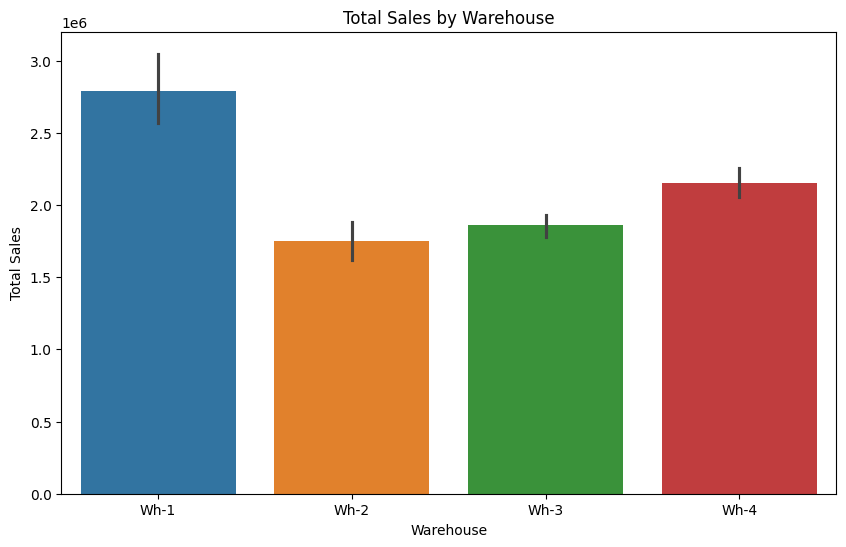

In [135]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Warehouse id', y='sales', data=df_long, estimator='sum',palette='tab10')
plt.title('Total Sales by Warehouse')
plt.xlabel('Warehouse')
plt.ylabel('Total Sales')
plt.show()


# Monthly sales growth rate by ware houses

<ipython-input-136-48c7be223a98>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_long_copy_clean, x='month-year', y='sales_pct_change', hue='Warehouse id', palette="tab10", ci=None, legend='full')


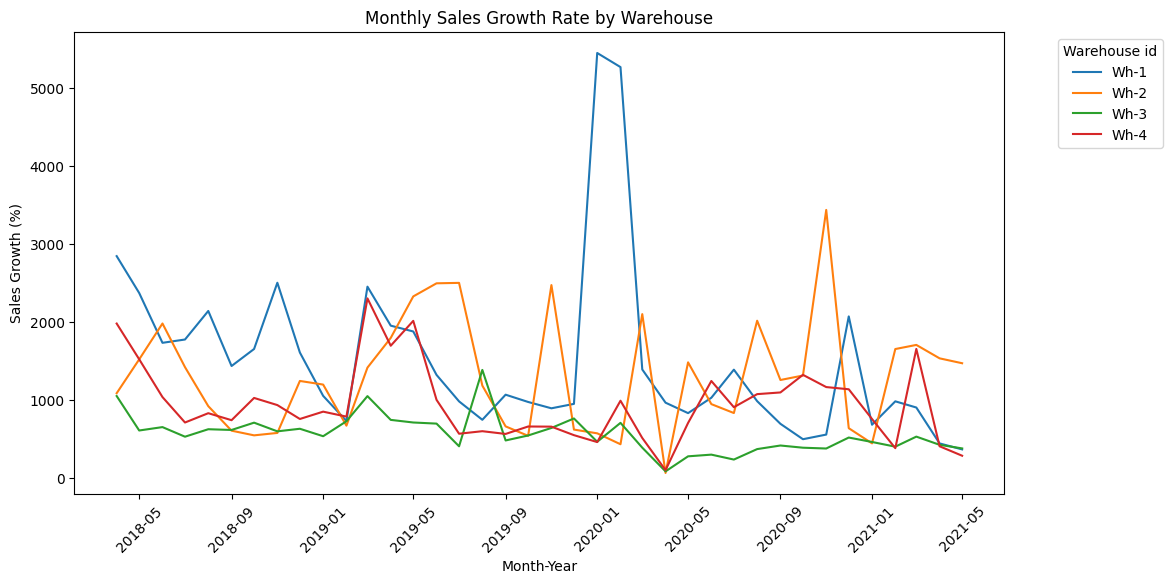

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a copy of df_long
df_long_copy = df_long.copy()

# Group by 'Warehouse id' to calculate monthly percentage change in sales
df_long_copy['sales_pct_change'] = df_long_copy.groupby('Warehouse id')['sales'].pct_change() * 100

# Drop NaN values caused by pct_change
df_long_copy_clean = df_long_copy.dropna(subset=['sales_pct_change'])

# Plot the monthly sales growth rate by warehouse
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long_copy_clean, x='month-year', y='sales_pct_change', hue='Warehouse id', palette="tab10", ci=None, legend='full')

# Title and labels
plt.title('Monthly Sales Growth Rate by Warehouse')
plt.xlabel('Month-Year')
plt.ylabel('Sales Growth (%)')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Adjust legend to make it clearer
plt.legend(title='Warehouse id', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


# Sales by region over time


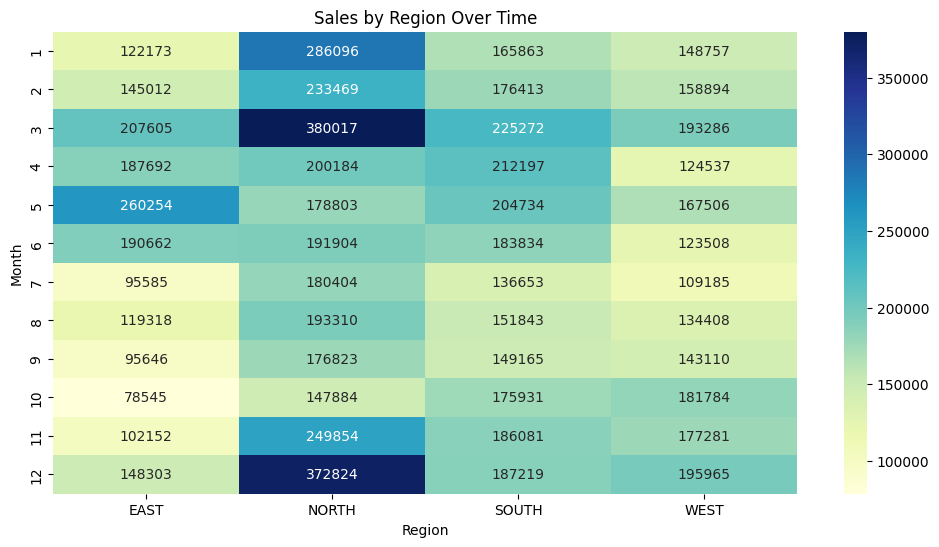

In [137]:


# Make sure the 'month-year' column is converted to datetime format
df_long_copy['month-year'] = pd.to_datetime(df_long_copy['month-year'])

# Extract month from the 'month-year' column
df_long_copy['month'] = df_long_copy['month-year'].dt.month

# Create a pivot table for the heatmap: sales over time for each region
sales_heatmap = df_long_copy.pivot_table(index='month', columns='Region', values='sales', aggfunc='sum')

# Plot the heatmap of sales by region over time
plt.figure(figsize=(12, 6))
sns.heatmap(sales_heatmap, annot=True, cmap="YlGnBu", fmt='g')
plt.title("Sales by Region Over Time")
plt.xlabel("Region")
plt.ylabel("Month")
plt.show()


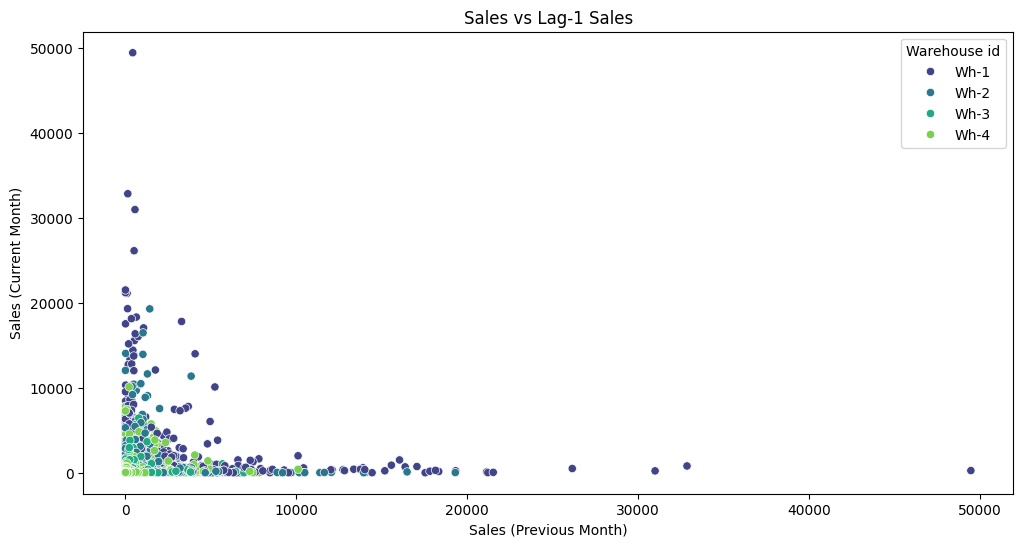

In [138]:
# Creating a copy of the dataframe for manipulation
df_copy = df_long_copy.copy()

# Create a lag feature (lag 1) for sales
df_copy['lag_1_sales'] = df_copy.groupby('Warehouse id')['sales'].shift(1)

# Drop the first row as it will have NaN for the lag feature
df_copy = df_copy.dropna(subset=['lag_1_sales'])

# Plot Sales vs Lag-1 Sales
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_copy, x='lag_1_sales', y='sales', hue='Warehouse id', palette='viridis')
plt.title("Sales vs Lag-1 Sales")
plt.xlabel("Sales (Previous Month)")
plt.ylabel("Sales (Current Month)")
plt.show()


In [139]:
df_long.head()

,Warehouse id,Region,SKU id,month-year,sales
0,Wh-1,NORTH,SKU-1,2018-04-01,27
1,Wh-1,NORTH,SKU-2,2018-04-01,88
2,Wh-1,NORTH,SKU-3,2018-04-01,6
3,Wh-1,NORTH,SKU-4,2018-04-01,162
4,Wh-1,NORTH,SKU-5,2018-04-01,171


Renames the month-year column to ds and sales column to y to align with Prophet's expected input format (ds for dates, y for the target variable).

In [140]:
df_long.columns

Index(['Warehouse id', 'Region', 'SKU id', 'month-year', 'sales'], dtype='object')

In [141]:
import pandas as pd
from prophet import Prophet


# Rename columns for Prophet
df_long.rename(columns={'month-year': 'ds', 'sales': 'y'}, inplace=True)

In [143]:
df_long.head()

,Warehouse id,Region,SKU id,ds,y
0,Wh-1,NORTH,SKU-1,2018-04-01,27
1,Wh-1,NORTH,SKU-2,2018-04-01,88
2,Wh-1,NORTH,SKU-3,2018-04-01,6
3,Wh-1,NORTH,SKU-4,2018-04-01,162
4,Wh-1,NORTH,SKU-5,2018-04-01,171


# External features


add_lag_features function creates lag features:

lag_1: Previous month's sales.

lag_3: Average sales over the last 3 months.

lag_6: Average sales over the last 6 months.

In [144]:

# Create lag features(exxternal data )
def add_lag_features(group):
    group = group.sort_values(by='ds')
    group['lag_1'] = group['y'].shift(1)  # Last month's sales
    group['lag_3'] = group['y'].rolling(window=3).mean().shift(1)  # Last 3 months' average sales
    group['lag_6'] = group['y'].rolling(window=6).mean().shift(1)  # Last 6 months' average sales
    return group

In [153]:
df_long

,Warehouse id,Region,SKU id,ds,y,lag_1,lag_3,lag_6
0,Wh-1,NORTH,SKU-1,2018-04-01,27,NaN,NaN,NaN
5,Wh-1,NORTH,SKU-6,2018-04-01,4,27.0,NaN,NaN
6,Wh-1,NORTH,SKU-7,2018-04-01,1179,4.0,NaN,NaN
7,Wh-1,NORTH,SKU-8,2018-04-01,406,1179.0,403.333333,NaN
8,Wh-1,NORTH,SKU-9,2018-04-01,264,406.0,529.666667,NaN
...,...,...,...,...,...,...,...,...
38965,Wh-3,WEST,SKU-71,2021-05-01,55,1.0,84.666667,68.000000
39468,Wh-4,SOUTH,SKU-217,2021-05-01,16,55.0,100.000000,76.500000
39449,Wh-4,SOUTH,SKU-319,2021-05-01,21,16.0,24.000000,76.666667
38702,Wh-2,EAST,SKU-31,2021-05-01,14,21.0,30.666667,57.666667


# Prophet

is a forecasting model developed by Facebook that is used for time-series data. It's designed to handle data with strong seasonal patterns, holidays, and other trends. The idea behind Prophet is to make forecasting easy and accessible, even for those without a deep background in statistics.


In [145]:


submission_df = pd.read_csv('/content/predictions.csv')

# Empty list to store forecasts
forecasts = []

# Loop over each combination from the submission file
for _, row in submission_df.iterrows():
    warehouse, region, sku = row['Warehouse id'], row['Region'], row['SKU id']

    # Get the group corresponding to this combination from the original dataset
    group = df_long[(df_long['Warehouse id'] == warehouse) &
                    (df_long['Region'] == region) &
                    (df_long['SKU id'] == sku)]

    # Add lag features for the group
    group = add_lag_features(group)
    group.dropna(inplace=True)

    # Initialize and train the Prophet model
    model = Prophet()
    model.add_regressor('lag_1')
    model.add_regressor('lag_3')
    model.add_regressor('lag_6')

    # Fit the model
    model.fit(group[['ds', 'y', 'lag_1', 'lag_3', 'lag_6']])

    # Create future dataframe for June 2021
    future = model.make_future_dataframe(periods=1, freq='M')

    # Add lag features for the forecast period
    future['lag_1'] = group['y'].iloc[-1]  # Use last month's sales as lag
    future['lag_3'] = group['y'].rolling(window=3).mean().iloc[-1]  # Last 3 months' avg sales
    future['lag_6'] = group['y'].rolling(window=6).mean().iloc[-1]  # Last 6 months' avg sales

    # Predict future sales
    forecast = model.predict(future)

    # Get the mean of the sales for the same SKU, warehouse, and region
    mean_sales = group['y'].mean()

    # Replace negative forecasted sales with the mean of the sales
    forecast['yhat'] = forecast['yhat'].apply(lambda x: mean_sales if x < 0 else x)

    # Append forecast for June 2021
    forecasts.append(forecast[['ds', 'yhat']].tail(1).assign(Warehouse=warehouse, Region=region, SKU=sku))

# Combine all forecasts into a single DataFrame
forecast_df = pd.concat(forecasts, ignore_index=True)

# Adjust the output to match the submission format
forecast_df.rename(columns={'ds': 'Jun-21', 'yhat': 'Sales'}, inplace=True)
final_submission = forecast_df[['Warehouse', 'Region', 'SKU', 'Sales']]

# Save the final submission
final_submission.to_csv('final_submission.csv', index=False)

# Display the final submission
print(final_submission.head())


Streaming output truncated to the last 5000 lines.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp55c9_ql3/wc4y4zmu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42433', 'data', 'file=/tmp/tmp55c9_ql3/aa6_zjvl.json', 'init=/tmp/tmp55c9_ql3/wc4y4zmu.json', 'output', 'file=/tmp/tmp55c9_ql3/prophet_model2zgg9xnq/prophet_model-20250105102616.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:26:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:26:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with w

  Warehouse Region    SKU       Sales
0      Wh-1  NORTH  SKU-1   11.562500
1      Wh-1  NORTH  SKU-2   18.046877
2      Wh-1  NORTH  SKU-3    7.625000
3      Wh-1  NORTH  SKU-4   79.062500
4      Wh-1  NORTH  SKU-5  246.093750


In [161]:
df_long

,Warehouse id,Region,SKU id,ds,y,lag_1,lag_3,lag_6
0,Wh-1,NORTH,SKU-1,2018-04-01,27,NaN,NaN,NaN
5,Wh-1,NORTH,SKU-6,2018-04-01,4,27.0,NaN,NaN
6,Wh-1,NORTH,SKU-7,2018-04-01,1179,4.0,NaN,NaN
7,Wh-1,NORTH,SKU-8,2018-04-01,406,1179.0,403.333333,NaN
8,Wh-1,NORTH,SKU-9,2018-04-01,264,406.0,529.666667,NaN
...,...,...,...,...,...,...,...,...
38965,Wh-3,WEST,SKU-71,2021-05-01,55,1.0,84.666667,68.000000
39468,Wh-4,SOUTH,SKU-217,2021-05-01,16,55.0,100.000000,76.500000
39449,Wh-4,SOUTH,SKU-319,2021-05-01,21,16.0,24.000000,76.666667
38702,Wh-2,EAST,SKU-31,2021-05-01,14,21.0,30.666667,57.666667


In [156]:
print(final_submission.head())


  Warehouse Region    SKU       Sales
0      Wh-1  NORTH  SKU-1   11.562500
1      Wh-1  NORTH  SKU-2   18.046877
2      Wh-1  NORTH  SKU-3    7.625000
3      Wh-1  NORTH  SKU-4   79.062500
4      Wh-1  NORTH  SKU-5  246.093750


In [157]:
# Rename the columns of final_submission DataFrame to match the submission format
final_submission.rename(columns={'Warehouse': 'Warehouse id',
                                 'Region': 'Region',
                                 'SKU': 'SKU id',
                                 'Sales': 'Jun-21'}, inplace=True)

# Save the final submission to a CSV file
final_submission.to_csv('final_submission.csv', index=False)

# Display the final submission
print(final_submission.head())


  Warehouse id Region SKU id      Jun-21
0         Wh-1  NORTH  SKU-1   11.562500
1         Wh-1  NORTH  SKU-2   18.046877
2         Wh-1  NORTH  SKU-3    7.625000
3         Wh-1  NORTH  SKU-4   79.062500
4         Wh-1  NORTH  SKU-5  246.093750


<ipython-input-157-1ffb20439b00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_submission.rename(columns={'Warehouse': 'Warehouse id',


In [165]:
forecast_df.columns,df_long.columns

(Index(['Jun-21', 'Sales', 'Warehouse', 'Region', 'SKU'], dtype='object'),
 Index(['Warehouse id', 'Region', 'SKU id', 'ds', 'y', 'lag_1', 'lag_3',
        'lag_6'],
       dtype='object'))